<a href="https://colab.research.google.com/github/ordevoir/Misc_Private/blob/main/OpenCV/opencv_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [OpenCV](https://docs.opencv.org/4.x/index.html)

Для установки пакета OpenCV для python из [PyPi](https://pypi.org/project/opencv-python/) пакетным менеждером, выполнить
```bash
pip install opencv-python
```
>При этом работать все будет только на CPU. Проверьте раздел [Manual builds](https://pypi.org/project/opencv-python/#manual-builds), если вы хотите скомпилировать привязки из исходного кода, чтобы включить дополнительные модули, такие как CUDA.

При установке на Linux может потребоваться установка зависимостей:

```bash
sudo apt-get install ffmpeg libsm6 libxext6  -y
```

In [5]:
import cv2
import numpy as np
cv2.__version__

'4.11.0'

# Download Image by URL

Функция для загрузки проивзольного файла по URL:

In [6]:
import requests
from os import mkdir
from os.path import basename, isdir

def download(url, location='.'):
    response = requests.get(url)
    if response.status_code != 200:
        raise IOError(f"response statis code is {response.status_code}")

    if not isdir(location):
        mkdir(location)

    path = location + '/' + basename(url)
    with open(path, "wb") as file:
        file.write(response.content)

    print(f'The file is successfully downloaded with path: \n{path}')

Загрузка изображения в локальное хранилище:

In [7]:
url = "https://raw.githubusercontent.com/ordevoir/Miscellaneous/master/images/c_vidal-room_with_a_views.png"
download(url, "./images")

The file is successfully downloaded with path: 
./images/c_vidal-room_with_a_views.png


# Read Image

In [31]:
path = 'images/c_vidal-room_with_a_views.png'
# path = 'images/example2.jpg'
original = cv2.imread(path)
print(f"{original.dtype = }\n{original.shape = }")

original.dtype = dtype('uint8')
original.shape = (800, 800, 3)


Первый аргумент `filename` – путь к файлу. Вторым аргументом (`flag`) можно задать значение из [`ImreadModes`](https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html).

Функция [`imread()`](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) возвращает массив NumPy, в формате **BGR** (Blue-Green-Red). Кроме того, функции `imshow()` и `imwrite()` также интерпретируют массив в формате **BGR**.

## Преобразование цветового пространства

При использовании других библиотек, интерпретирующих в формат **RGB** (Pillow, matplotlib), необходимо конвертировать **BGR** в **RGB**. Для этого можно использовать функцию [`cvtColor()`](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). Первый аргумент (`src`) – массив изображения, второй аргумент (`code`) – код преобразования цветового пространства ([ColorConversionCodes](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)).

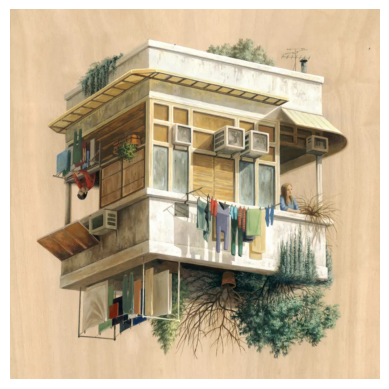

In [ ]:
import matplotlib.pyplot as plt

img_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

plt.axis(False)
plt.imshow(img_rgb)
# plt.imshow(original)

# Show Image

## Using matplotlib

В модуле plot_tools.py определены функции `show_image()` и `show_images()`, которые могут визуализировать посредством matplotlib, произвольное количество изображений (`ndarray`), переданных в качестве аргументов. Для визаулизации изображений с цветовым пространством BGR, можно воспользоваться функциями `show_image_bgr()` и `show_images_bgr()`. По желанию можно указать последовательность заголовков для каждогой изображения (`title` / `titles`), размер изображений (`size`), фоновый цвет (`facecolor`). А для визуализации множества изображений, можно указать еще и число колонок (`n_cols`).

In [13]:
url = "https://raw.githubusercontent.com/ordevoir/Miscellaneous/master/plot_tools.py"
download(url)

The file is successfully downloaded with path: 
./plot_tools.py


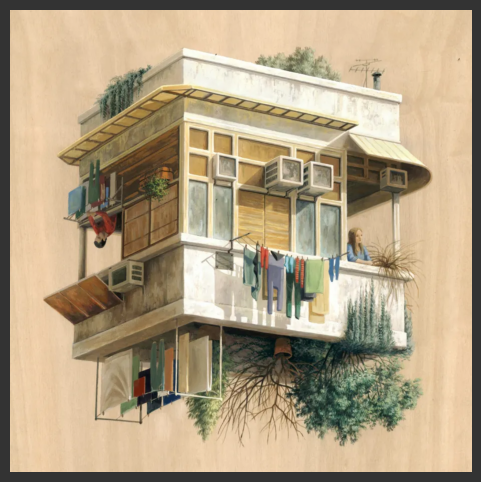

In [14]:
from plot_tools import show_image, show_image_bgr, show_images, show_images_bgr

show_image_bgr(image=original, size=6)

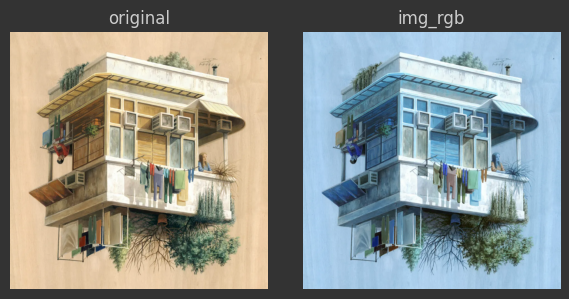

In [15]:
show_images_bgr(images=[original, img_rgb], 
                titles=("original", "img_rgb"), size=3)

### Визуализация одноканальных изображений 16 bit

In [16]:
mono_img_16bit_B = (original.astype(np.uint16) * 256)[..., 0]
mono_img_16bit_G = (original.astype(np.uint16) * 256)[..., 1]
mono_img_16bit_R = (original.astype(np.uint16) * 256)[..., 2]

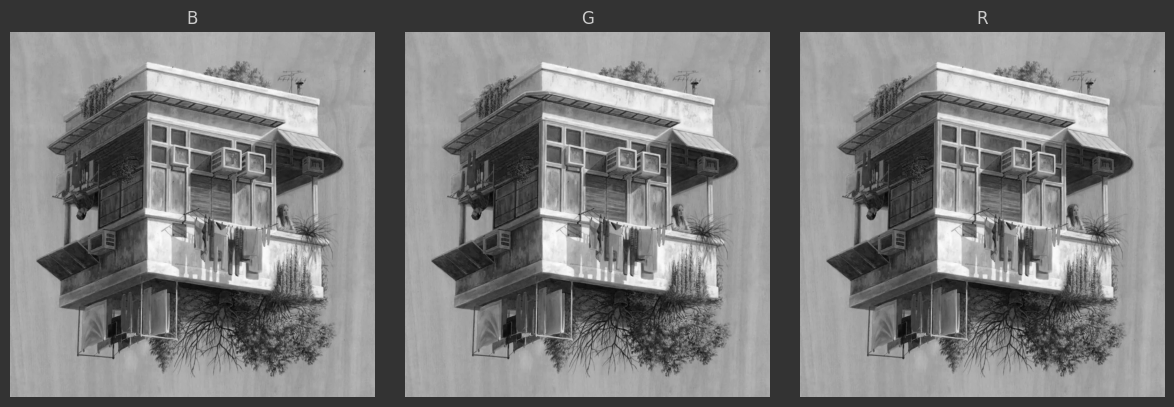

In [17]:
show_images((mono_img_16bit_B, mono_img_16bit_B, mono_img_16bit_B), 
            titles=('B', 'G', 'R'), n_cols=3, vmax=2**16)

## `imshow()`

OpenCV позволяет визуализировать изображение в отдельном окне. Фукнция [`imshow()`](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) первым аргументом (`winname`) принимает название окна, а вторым аргументом (`mat`) объект класса `ndarray` или [`Mat`](https://docs.opencv.org/4.x/d6/d6d/tutorial_mat_the_basic_image_container.html).

Для успешнного отображения необходимо также вызвать функции `waitKey(0)` которая будет ждать нажатия какой либо клавиши, и `destroyAllWindows()`, которая закроет все открытые окна.

In [18]:
cv2.imshow('Image', original)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Show Image in Colab

При использовании Google Colab можно столкнуться с ошибкой `DisabledFunctionError`, в этом случае предлагается использовать метод `cv2_imshow()` из патчей:

In [ ]:
# from google.colab.patches import cv2_imshow

# img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)

# Write Image

Фукнция [`imwrite()`](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) первым аргументом (`filename`) принимает имя файла, а вторым аргументом (`mat`) объект класса `ndarray` или [`Mat`](https://docs.opencv.org/4.x/d6/d6d/tutorial_mat_the_basic_image_container.html). Третьим необязательным аргументом (`params`) можно передать список специфических параметров для сохраняемого формата, например, если бы мы сохраняли в формате JPEG, то можно было бы задать качество: `[cv2.IMWRITE_JPEG_QUALITY, 90]`.

> `imwrite()` возвращает `True`, если изображение успешно сохранено, и `False` в противном случае.

In [19]:
from os.path import dirname, basename

directory, filename = dirname(path), basename(path)
print(f"{directory = }\n{filename  = }")

new_path = directory + "/saved_" + filename
print(new_path)

cv2.imwrite(new_path, original)

directory = 'images'
filename  = 'c_vidal-room_with_a_views.png'
images/saved_c_vidal-room_with_a_views.png


True

## Сохранение с изменением формата

In [20]:
from os.path import splitext

filename, ext = splitext(path)

new_path = filename + '_saved.jpg'
print(new_path)

cv2.imwrite(new_path, original, [cv2.IMWRITE_JPEG_QUALITY, 90])

images/c_vidal-room_with_a_views_saved.jpg


True

# LUT

Look-up Table представляет собой таблицу для преобразования значений пикселей. Такие таблицы бывают полезны, когда преобразование значения интенсивности канала пикселя, зависит только от его собственного значния. LUT позволяет сократить вычисления, и сделать преобразование более удобным. Фактически, LUT представляет собой массив из 256 элементов (для 16-битных каналов – 65536 элментов), в котором индексам массива соответствуют интенсивности канала входного изображения, а значениям – интенсивности для выходного изображения. Т.е. LUT – табличная функция, для отображения входных значений интенсивностей в выходные значения.

Пусть, к примеру, мы хотим произвести редукцию цветов (color space reduction). Такое преобразование можно записать так:

$$
I_{out} = \left \lfloor \frac{I_{in}}{64} \right \rfloor \times 64
$$

Как вариант, можно написать функцию, которая будет применять к каждому каналу каждого пикселя, и вычислять новое значение интенсивности. Такое решение требует лишние вычисления: скажем, если пикселей, со значением 70 в изображении 1000 штук, то функция будет вызвана 1000 раз, с одним и тем же результатом. Однако можно вместо этого один раз вычислить значения функции для всех возможных значений пикселей и создать таким образом LUT, а далее применять его для преобразований.

>Использование LUT в C++ рассмотрено в OpenCV_Mat_Iterate_LUT_(C++).md

In [26]:
200 // 100

2

In [21]:
reduce_lut = np.array([(i // 100) * 100 for i in range(256)])
print(reduce_lut) 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 20

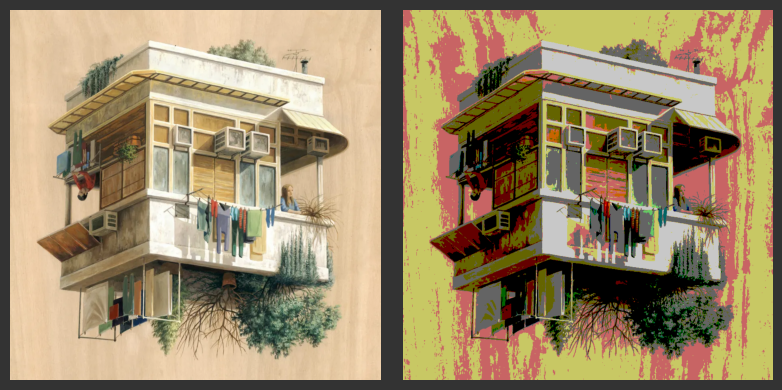

In [27]:
reduced = reduce_lut[original]

show_images_bgr([original, reduced])

# Афинные преобразования

Преобразование производится при помощи функции `warpAffine()`. Для того, чтобы произвести сдвиг изображения, необходимо создать трансформационную матрицу.

> В аргументе `flags` задается метод интерполяции.

## Translation

Трансформационная матрица, соответствующая сдвигу:

\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
\end{bmatrix}

В аргументе `dsize` задается кортеж с желаемым размером результирующего изображения. Так как размер остается прежним, что проивзодится просто сдвиг.

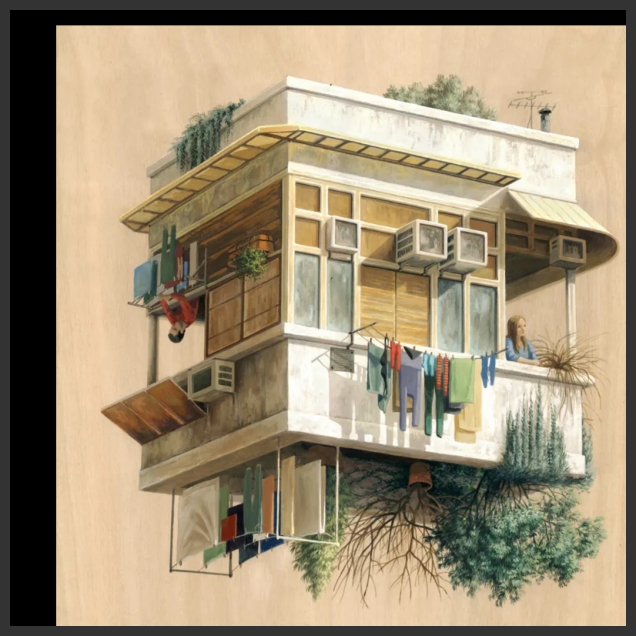

In [28]:
num_rows, num_cols = original.shape[:2]
translation_matrix = np.float32([[1, 0, 60],
                                 [0, 1, 20]])

img_shifted = cv2.warpAffine(src=original,
                             M=translation_matrix,
                             dsize=(num_cols, num_rows),
                            #  flags=cv2.INTER_LINEAR,
                            #  borderMode=cv2.BORDER_REFLECT,
                            #  borderValue=0,
                             )
show_image_bgr(img_shifted)

В следующем примере, помимо сдивга на `10px`, как по вертикали, так и по горизонтали, в `dsize` задается кортеж с большим (на `20px`) размером результирующего изображения. Данный сдвиг и масштабирование прведут к тому, что в целом изображение окажется выровненным по-середине, за счет увеличения полотна, свободная по краям область будет заполнена цвеком, заданным в аргументе `borderValue`:


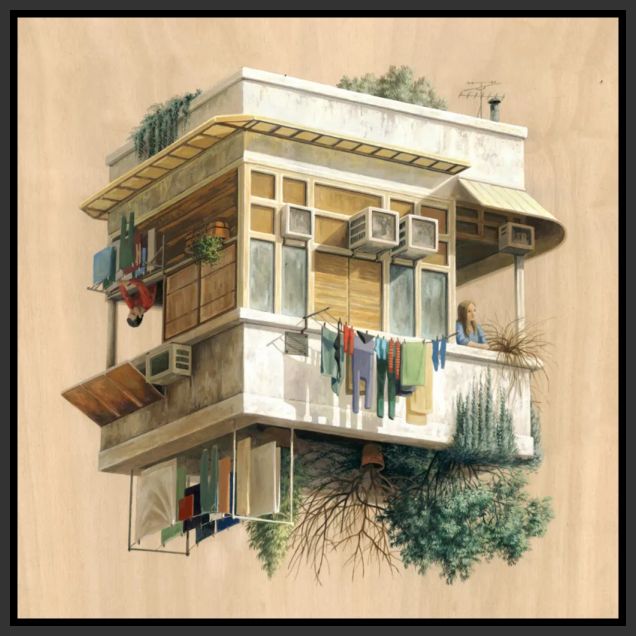

In [30]:
num_rows, num_cols = original.shape[:2]
translation_matrix = np.float32([[1, 0, 10],
                                 [0, 1, 10]])
img_shifted = cv2.warpAffine(original, translation_matrix,
                             (num_cols+20, num_rows+20),
                            #  borderValue=(255, 150, 50),    # цвет
                             )
show_image_bgr(img_shifted)

# 2D Convolution

![a](images/convolution.gif)

## Identity and Blur Kernels

Ядра свертки можно создать при помощи NumPy. Создадим, к примеру ядро $3 \times 3$ тождественного преобразования (**identity kernel**):

In [ ]:
identity_kernel = np.zeros((3, 3), dtype=float)
identity_kernel[1, 1] = 1
identity_kernel

Создадим ядро $3 \times 3$ для размытия (**box blur**):

In [ ]:
bluring_kernel_3x3 = np.ones((3, 3), dtype=float)
bluring_kernel_3x3 /= bluring_kernel_3x3.sum()
bluring_kernel_3x3

Мы создали матрицу из единиц, и поделили все элементы матрицы на 9, чтобы сумма всех элементов матрицы равнялась единице. Это называется нормализацией (**normalization**). Если этого не сделать, то при наложении ядра на участок изображения, будут просуммированны значения яркостей 9 пикселей, что вообще говоря может вывести за пределы допустимых значений. Для того, чтобы получить усредненное значение 9 пикселей при помощи свертки, необходимо нормализовать ядро свертки. Для identity kernel нормализация по понятным причинам не требовалась.

Создадим также ядро $5 \times 5$ для размытия:

In [ ]:
size = 15
bluring_kernel_5x5 = np.ones((size, size), dtype=float) / size ** 2

In [ ]:
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=float)
gaussian_kernel /= gaussian_kernel.sum()

## `filter2D()`

Для того, чтобы применить ядра к изображению и получить результаты свертки, можно воспользоваться функцией `filter2D()`. Вторым аргументом (`ddepth` – desirable depth) передается значение глубины результирующего изображения; при значении `-1` глубина будет равна глубине исходного изображения.

In [ ]:
blured_img_3x3 = cv2.filter2D(original, -1, bluring_kernel_3x3)
blured_img_5x5 = cv2.filter2D(original, -1, bluring_kernel_5x5)
blured_gaussian = cv2.filter2D(original, -1, gaussian_kernel)

show_images_bgr((original, blured_img_3x3, blured_img_5x5, blured_gaussian),
         ("original", "blured_img_3x3", "blured_img_5x5", "blured_gaussian"),
         size=6)

> Функции OpenCV, для реалиации размытия, описаны в Blur_Denoise_Sharpen.